<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/99.%20Final%20Project/Modeling%20with%20OrdinalEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Context**
- The telco customer churn data contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Problem Background**
- Customer churn is one of the biggest problems in the telecommunications industry
- By definition, customer churn is when customers stop interacting (subscribe) with the company
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understand the customer behaviors: what keeps customers using the service and what makes them leave the service
<br><br>

**Contents**
1. Dataset Information
2. Importing Libraries
3. Dataset Overview
4. Dataset Overview - Function
5. Exploratory Data Analysis
6. Data Preprocessing

# 1. Dataset Information
This dataset comes from Kaggle, you can find it here: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn).
<br><br>
This dataset is used to predict behavior to retain customers. Each row represents a customer, and each column contains customer's attribute.
<br><br>
**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not
<br><br>

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.

# 2. Importing Libraries

In [1]:
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn
# !pip install xgboost

!pip install inflection
# !pip install dython

In [34]:
# association between attributes
# from dython.nominal import associations

# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# I change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# 4. Dataset Overview - Function

In [3]:
#@title Just Run This Function

def get_camel_case(data):
  # renaming column
  column_list = list(data.columns)

  for i, col in enumerate(column_list):
    column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

  return column_list

def get_data_type(data, column_list_numerical):
  # general data type
  data_type_general = dict()

  for col in data.columns:
    if col in column_list_numerical:
      data_type_general[col] = 'numerical'
    else:
      data_type_general[col] = 'categorical'

  tmp = pd.Series(data_type_general)
  data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
  
  # pythonic data type
  data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
  data['total_charges'].fillna(0, inplace=True)
  data['total_charges'] = data['total_charges'].astype(float)

  data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})

  return data_type_general, data_type_python

def get_data_variation(data, column_list_numerical, column_list_categorical):
  # numerical data variation
  variation_numerical = dict()

  for col in column_list_numerical:
    tmp = f'{data[col].min()} - {data[col].max()}'
    variation_numerical[col] = tmp

  tmp = pd.Series(variation_numerical)
  data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # categorical data variation
  variation_categorical = dict()

  for col in column_list_categorical:
    tmp = data[col].unique().tolist()
    tmp.sort()
    variation_categorical[col] = ', '.join(str(item) for item in tmp)

  tmp = pd.Series(variation_categorical)
  data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

  # overall data variation
  data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)

  return data_variation

def get_dataset_overview(data):
  # renaming column
  column_list = get_camel_case(data)
  data.columns = column_list

  # total duplicated values
  # print('Total duplicated values:', data.duplicated().sum())

  # dropping column 
  data.drop('customer_id', axis=1, inplace=True)

  # column list
  column_list_numerical = ['tenure', 'monthly_charges', 'total_charges']
  column_list_categorical = list(data.columns)
  column_list_categorical.remove('tenure')
  column_list_categorical.remove('monthly_charges')
  column_list_categorical.remove('total_charges')

  # data type
  data_type_general, data_type_python = get_data_type(data, column_list_numerical)

  # total data
  data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})

  # total null values
  data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})

  # percentage of null values
  data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})

  # data variation
  data_variation = get_data_variation(data, column_list_numerical, column_list_categorical)

  data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

  data_info = data_info.reindex(data.columns, axis=1)

  return data, data_info

In [4]:
#@title And Then Run This
path = 'https://raw.githubusercontent.com/adhang/datasets/main/telco-customer-churn.csv'

data = pd.read_csv(path)
data, data_info = get_dataset_overview(data)

# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

In [ ]:
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","0, 1","No, Yes","No, Yes",0 - 72,"No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# 6. Data Preprocessing

## Preprocessing

In [5]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

# =========================================
# TRAIN - TEST SPLIT
# =========================================
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

# =========================================
# LABEL ENCODING
# =========================================
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

oe = OrdinalEncoder()
oe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_oe = oe.transform(X_train[column_categorical])
X_test_oe = oe.transform(X_test[column_categorical])

# =========================================
# COMBINE NUMERICAL COLUMN & ENCODED CATEGORICAL
# =========================================
# create dataframe from one-hot encoded features
X_train_oe_df = pd.DataFrame(X_train_oe, columns=column_categorical, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_oe_df], axis=1)

# create dataframe from one-hot encoded features
X_test_oe_df = pd.DataFrame(X_test_oe, columns=column_categorical, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_oe_df], axis=1)

# =========================================
# FEATURE SCALING
# =========================================
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## Encoded Dataframe

In [6]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['churn_1'].fillna(data_encode['churn_2'], inplace=True)
data_encode.drop(columns='churn_2', inplace=True)
data_encode.rename(columns={'churn_1':'churn'}, inplace=True)

data_encode.head()

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
6427,41,20.15,802.35,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,0.0
6971,18,99.75,1836.25,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0
96,71,66.85,4748.70,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
5640,1,79.60,79.60,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0
414,48,70.65,3545.05,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Scaled Dataframe
This dataframe has been encoded and scaled

In [7]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.head()

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
6427,0.569444,0.017439,0.092386,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,0.0
6971,0.250000,0.810663,0.211433,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0
96,0.986111,0.482810,0.546783,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
5640,0.013889,0.609865,0.009165,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0
414,0.666667,0.520678,0.408190,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Resampling

In [8]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
# column_categorical.remove('churn')

### SMOTE

In [9]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

### SMOTENC

In [15]:
# column 3-45 is categorical (exclude the target)
smotenc = SMOTENC(random_state=1, categorical_features=np.arange(3,X_train_scale.shape[1])) # 46 because exclusive

X_train_smotenc, y_train_smotenc = smotenc.fit_resample(X_train_scale, y_train_encode)

X_train_smotenc_df = pd.DataFrame(X_train_smotenc, columns=X_train_smotenc.columns)
y_train_smotenc_df = pd.DataFrame(y_train_smotenc, columns=['churn'])

data_smotenc = pd.concat([X_train_smotenc_df, y_train_smotenc_df], axis=1)

### ADASYN

In [16]:
adasyn = ADASYN(random_state=1)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scale, y_train_encode)

X_train_adasyn_df = pd.DataFrame(X_train_adasyn, columns=X_train_adasyn.columns)
y_train_adasyn_df = pd.DataFrame(y_train_adasyn, columns=['churn'])

data_adasyn = pd.concat([X_train_adasyn_df, y_train_adasyn_df], axis=1)

# Modeling

## Function

### Print Single Report

In [17]:
def print_report(y_test, y_pred, average='macro', full_report=True):
  if full_report:
    print(classification_report(y_test, y_pred, digits=3))
    print('==============================================================')
    print('==============================================================')

  print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
  print('Precision\t: ', round(precision_score(y_test, y_pred, average=average),3)) 
  print('Recall\t\t: ', round(recall_score(y_test, y_pred, average=average),3))
  print('F1 Score\t: ', round(f1_score(y_test, y_pred, average=average),3)) 
  print('ROC AUC\t\t: ', round(roc_auc_score(y_test, y_pred, average=average),3)) 

### Highlight Max-Min

In [18]:
def highlight_max_min(df):
  display(df.round(3).style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

### Print Score

In [19]:
def print_score(y_pred_list, orderby='accuracy', average='macro', sort=True):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    accuracy.append(accuracy_score(y_test_encode, y_pred))
    precision.append(precision_score(y_test_encode, y_pred, average=average))
    recall.append(recall_score(y_test_encode, y_pred, average=average))
    f1.append(f1_score(y_test_encode, y_pred, average=average))
    roc_auc.append(roc_auc_score(y_test_encode, y_pred, average=average))

  score_list = {
      'model':model_name,
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1_score':f1,
      'roc_auc':roc_auc
  }

  if sort:
    score_df = pd.DataFrame(score_list).set_index('model').sort_values(orderby, ascending=False)
  else:
    score_df = pd.DataFrame(score_list).set_index('model')
    
  highlight_max_min(score_df)

  return score_df

### Grid Search

In [20]:
def grid_search(model, grid, X, y, name='', scoring='accuracy'):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  
  grid_search = GridSearchCV(estimator=model, param_grid=grid,
                             n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
  
  grid_result = grid_search.fit(X, y)

  # summarize results
  print(f'{name}\t: {round(grid_result.best_score_,3)} with {grid_result.best_params_}')

  # means = grid_result.cv_results_['mean_test_score']
  # stds = grid_result.cv_results_['std_test_score']
  # params = grid_result.cv_results_['params']
  # for mean, stdev, param in zip(means, stds, params):
  #     print("%f (%f) with: %r" % (mean, stdev, param))

  return grid_result.best_params_

## Default Parameter

In [21]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'AdaBoost':AdaBoostClassifier(random_state=1),
    'Gradient Boosting':GradientBoostingClassifier(random_state=1),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1)
}

### SMOTE

In [22]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.752000,0.716000,0.767000,0.722000,0.767000
Ridge Classifier,0.748000,0.712000,0.762000,0.718000,0.762000
KNN,0.678000,0.645000,0.681000,0.643000,0.681000
SVC,0.743000,0.697000,0.737000,0.705000,0.737000
Decision Tree,0.727000,0.663000,0.680000,0.669000,0.680000
Random Forest,0.777000,0.715000,0.720000,0.717000,0.720000
AdaBoost,0.774000,0.720000,0.751000,0.730000,0.751000
Gradient Boosting,0.789000,0.734000,0.755000,0.742000,0.755000
Hist Gradient Boosting,0.781000,0.721000,0.726000,0.723000,0.726000


### SMOTENC

In [24]:
X_train_model = X_train_smotenc.copy()
y_train_model = y_train_smotenc.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smotenc = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.749000,0.708000,0.754000,0.715000,0.754000
Ridge Classifier,0.742000,0.706000,0.756000,0.711000,0.756000
KNN,0.706000,0.662000,0.697000,0.666000,0.697000
SVC,0.755000,0.705000,0.742000,0.715000,0.742000
Decision Tree,0.723000,0.654000,0.666000,0.659000,0.666000
Random Forest,0.769000,0.708000,0.722000,0.714000,0.722000
AdaBoost,0.747000,0.709000,0.757000,0.715000,0.757000
Gradient Boosting,0.758000,0.710000,0.749000,0.719000,0.749000
Hist Gradient Boosting,0.765000,0.711000,0.741000,0.721000,0.741000


### ADASYN

In [25]:
X_train_model = X_train_adasyn.copy()
y_train_model = y_train_adasyn.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_adasyn = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.740000,0.712000,0.767000,0.714000,0.767000
Ridge Classifier,0.731000,0.706000,0.760000,0.705000,0.760000
KNN,0.654000,0.640000,0.679000,0.628000,0.679000
SVC,0.723000,0.690000,0.736000,0.692000,0.736000
Decision Tree,0.719000,0.651000,0.665000,0.656000,0.665000
Random Forest,0.781000,0.720000,0.724000,0.722000,0.724000
AdaBoost,0.769000,0.717000,0.751000,0.727000,0.751000
Gradient Boosting,0.783000,0.727000,0.752000,0.737000,0.752000
Hist Gradient Boosting,0.784000,0.724000,0.728000,0.726000,0.728000


### Compare

In [26]:
scoring_list = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

score_compare = dict()

for score in scoring_list:
  col_smote = score_smote.loc[:, score]
  col_smotenc = score_smote.loc[:, score]
  col_adasyn = score_adasyn.loc[:, score]

  score_dict = {
    col_smote.name + '_smote' : col_smote.sort_index().values,
    col_smotenc.name + '_smotenc' : col_smotenc.sort_index().values,
    col_adasyn.name + '_adasyn' : col_adasyn.sort_index().values,
  }

  score_df = pd.DataFrame(score_dict, index=col_smote.sort_index().index).sort_values(score+'_smote', ascending=False)
  # display(score_df.style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

  score_compare[score] = score_df

#### Accuracy

In [27]:
highlight_max_min(score_compare['accuracy'])

,accuracy_smote,accuracy_smotenc,accuracy_adasyn
model,,,
Gradient Boosting,0.789000,0.789000,0.783000
XGBoost,0.783000,0.783000,0.784000
Hist Gradient Boosting,0.781000,0.781000,0.784000
Random Forest,0.777000,0.777000,0.781000
AdaBoost,0.774000,0.774000,0.769000
Logistic Regression,0.752000,0.752000,0.740000
Ridge Classifier,0.748000,0.748000,0.731000
SVC,0.743000,0.743000,0.723000
Neural Network,0.732000,0.732000,0.724000


#### Precision

In [28]:
highlight_max_min(score_compare['precision'])

,precision_smote,precision_smotenc,precision_adasyn
model,,,
Gradient Boosting,0.734000,0.734000,0.727000
XGBoost,0.728000,0.728000,0.729000
Hist Gradient Boosting,0.721000,0.721000,0.724000
AdaBoost,0.720000,0.720000,0.717000
Logistic Regression,0.716000,0.716000,0.712000
Random Forest,0.715000,0.715000,0.720000
Ridge Classifier,0.712000,0.712000,0.706000
SVC,0.697000,0.697000,0.690000
Neural Network,0.666000,0.666000,0.669000


#### Recall

In [29]:
highlight_max_min(score_compare['recall'])

,recall_smote,recall_smotenc,recall_adasyn
model,,,
Logistic Regression,0.767000,0.767000,0.767000
Ridge Classifier,0.762000,0.762000,0.760000
XGBoost,0.755000,0.755000,0.755000
Gradient Boosting,0.755000,0.755000,0.752000
AdaBoost,0.751000,0.751000,0.751000
SVC,0.737000,0.737000,0.736000
Hist Gradient Boosting,0.726000,0.726000,0.728000
Random Forest,0.720000,0.720000,0.724000
KNN,0.681000,0.681000,0.679000


#### F1 Score

In [30]:
highlight_max_min(score_compare['f1_score'])

,f1_score_smote,f1_score_smotenc,f1_score_adasyn
model,,,
Gradient Boosting,0.742000,0.742000,0.737000
XGBoost,0.738000,0.738000,0.739000
AdaBoost,0.730000,0.730000,0.727000
Hist Gradient Boosting,0.723000,0.723000,0.726000
Logistic Regression,0.722000,0.722000,0.714000
Ridge Classifier,0.718000,0.718000,0.705000
Random Forest,0.717000,0.717000,0.722000
SVC,0.705000,0.705000,0.692000
Neural Network,0.672000,0.672000,0.676000


#### ROC AUC

In [31]:
highlight_max_min(score_compare['roc_auc'])

,roc_auc_smote,roc_auc_smotenc,roc_auc_adasyn
model,,,
Logistic Regression,0.767000,0.767000,0.767000
Ridge Classifier,0.762000,0.762000,0.760000
XGBoost,0.755000,0.755000,0.755000
Gradient Boosting,0.755000,0.755000,0.752000
AdaBoost,0.751000,0.751000,0.751000
SVC,0.737000,0.737000,0.736000
Hist Gradient Boosting,0.726000,0.726000,0.728000
Random Forest,0.720000,0.720000,0.724000
KNN,0.681000,0.681000,0.679000


## Feature Selection (SMOTE)

In [32]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

### Univariate Filter

before filter	: (7244, 19)
after filter	: (7244, 10)


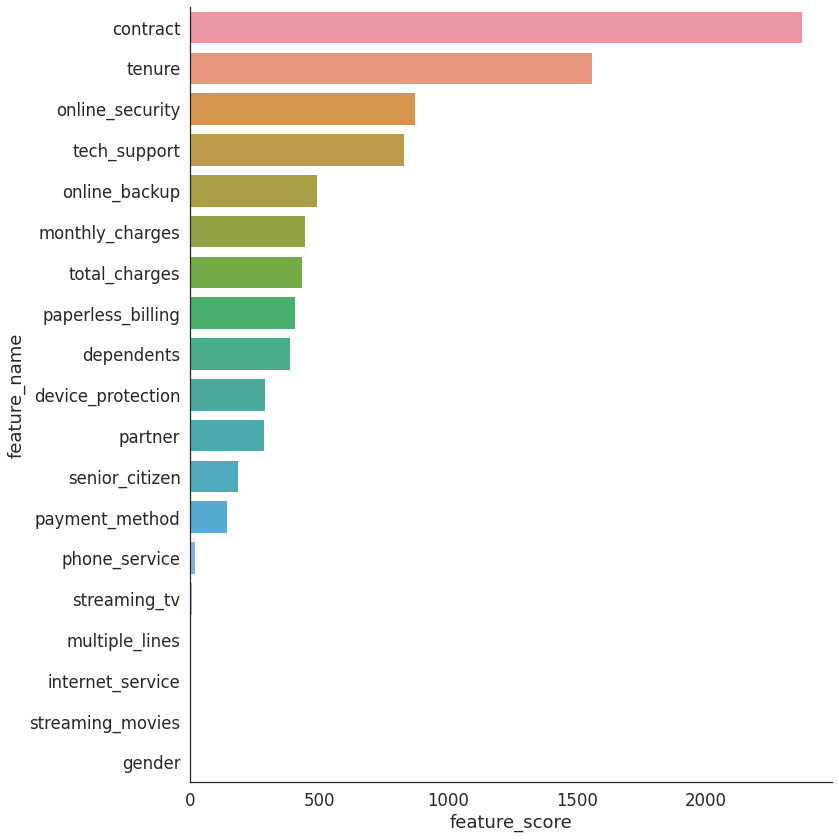

In [36]:
filter = SelectKBest(score_func=f_classif, k=10)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_scale)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_score', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [38]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_smote_filter = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.743000,0.708000,0.758000,0.713000,0.758000
Ridge Classifier,0.736000,0.704000,0.755000,0.707000,0.755000
KNN,0.736000,0.680000,0.709000,0.688000,0.709000
SVC,0.742000,0.701000,0.746000,0.708000,0.746000
Decision Tree,0.727000,0.657000,0.666000,0.661000,0.666000
Random Forest,0.769000,0.706000,0.716000,0.711000,0.716000
AdaBoost,0.768000,0.721000,0.764000,0.732000,0.764000
Gradient Boosting,0.769000,0.720000,0.761000,0.731000,0.761000
Hist Gradient Boosting,0.779000,0.723000,0.750000,0.733000,0.750000


### Wrapper Method (RFE)

#### Logistic Regression

before wrapper	: (7244, 19)
after wrapper	: (7244, 10)


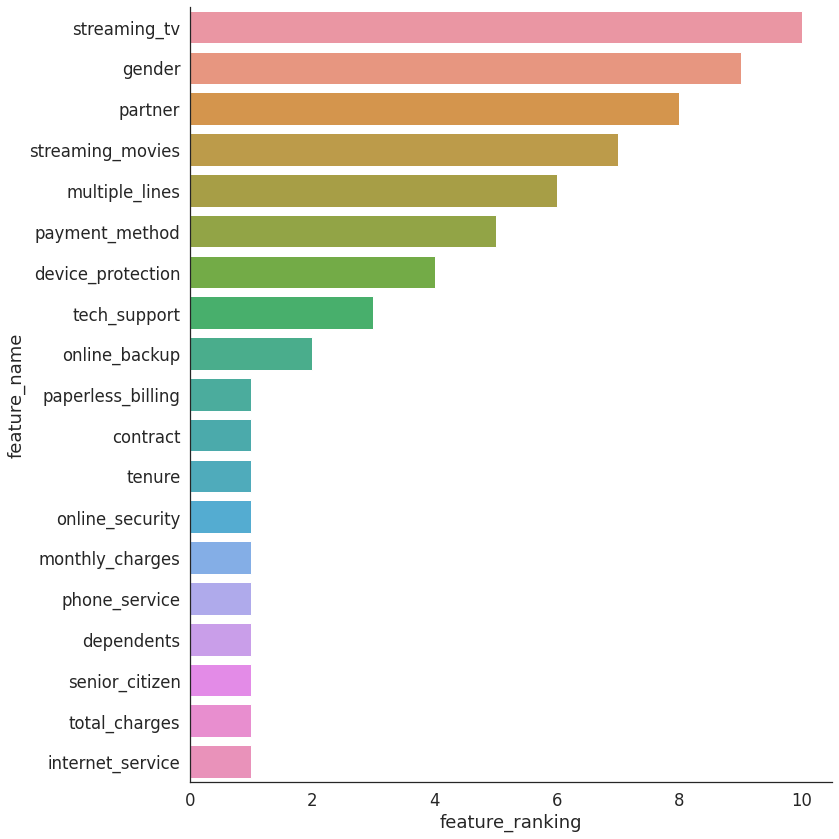

In [40]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression()

wrapper = RFE(estimator=estimator, n_features_to_select=10)
wrapper.fit(X_train_model, y_train_model)

X_train_wrapper = wrapper.transform(X_train_model)
X_test_wrapper = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrapper.shape)

# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_ranking', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [42]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrapper, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrapper)

score_smote_wrap_lr = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.752000,0.715000,0.765000,0.721000,0.765000
Ridge Classifier,0.741000,0.707000,0.758000,0.711000,0.758000
KNN,0.741000,0.680000,0.701000,0.687000,0.701000
SVC,0.755000,0.712000,0.756000,0.720000,0.756000
Decision Tree,0.734000,0.662000,0.669000,0.665000,0.669000
Random Forest,0.778000,0.716000,0.721000,0.718000,0.721000
AdaBoost,0.774000,0.726000,0.767000,0.737000,0.767000
Gradient Boosting,0.782000,0.730000,0.762000,0.741000,0.762000
Hist Gradient Boosting,0.777000,0.718000,0.734000,0.725000,0.734000


#### Decision Tree

before wrapper	: (7244, 19)
after wrapper	: (7244, 10)


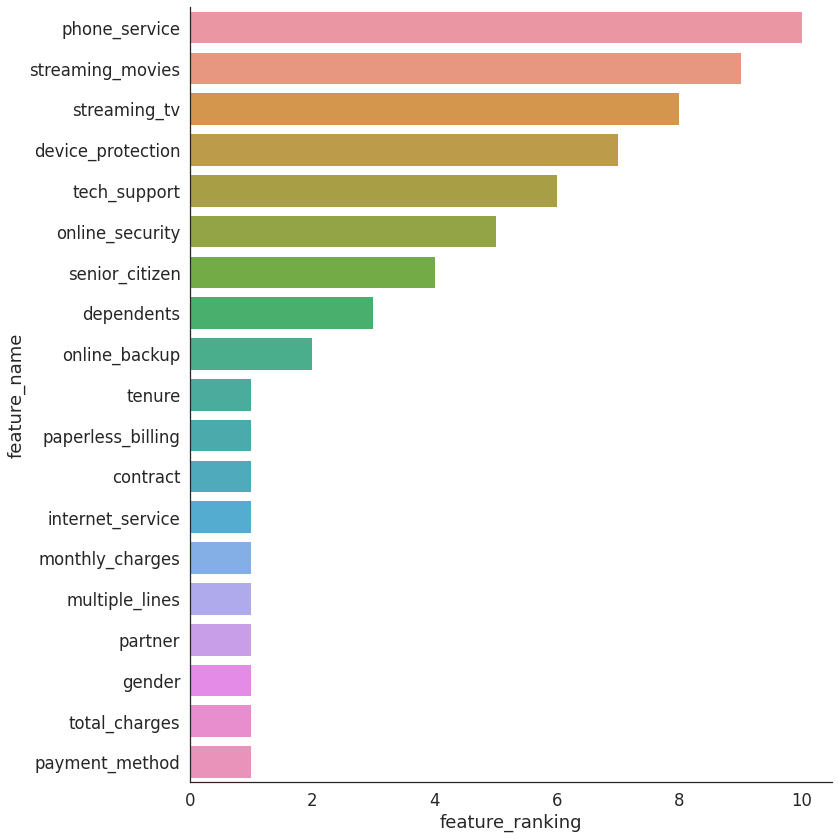

In [43]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=10)
wrapper.fit(X_train_model, y_train_model)

X_train_wrapper = wrapper.transform(X_train_model)
X_test_wrapper = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrapper.shape)

# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_ranking', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [44]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrapper, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrapper)

score_smote_wrap_dt = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.743000,0.712000,0.766000,0.715000,0.766000
Ridge Classifier,0.734000,0.703000,0.754000,0.706000,0.754000
KNN,0.734000,0.675000,0.699000,0.682000,0.699000
SVC,0.740000,0.698000,0.741000,0.705000,0.741000
Decision Tree,0.740000,0.673000,0.685000,0.678000,0.685000
Random Forest,0.772000,0.708000,0.709000,0.709000,0.709000
AdaBoost,0.775000,0.723000,0.756000,0.734000,0.756000
Gradient Boosting,0.777000,0.721000,0.746000,0.730000,0.746000
Hist Gradient Boosting,0.783000,0.722000,0.728000,0.725000,0.728000


### Embedded Method

#### Logistic Regression

before embedded	: (7244, 19)
after embedded	: (7244, 5)


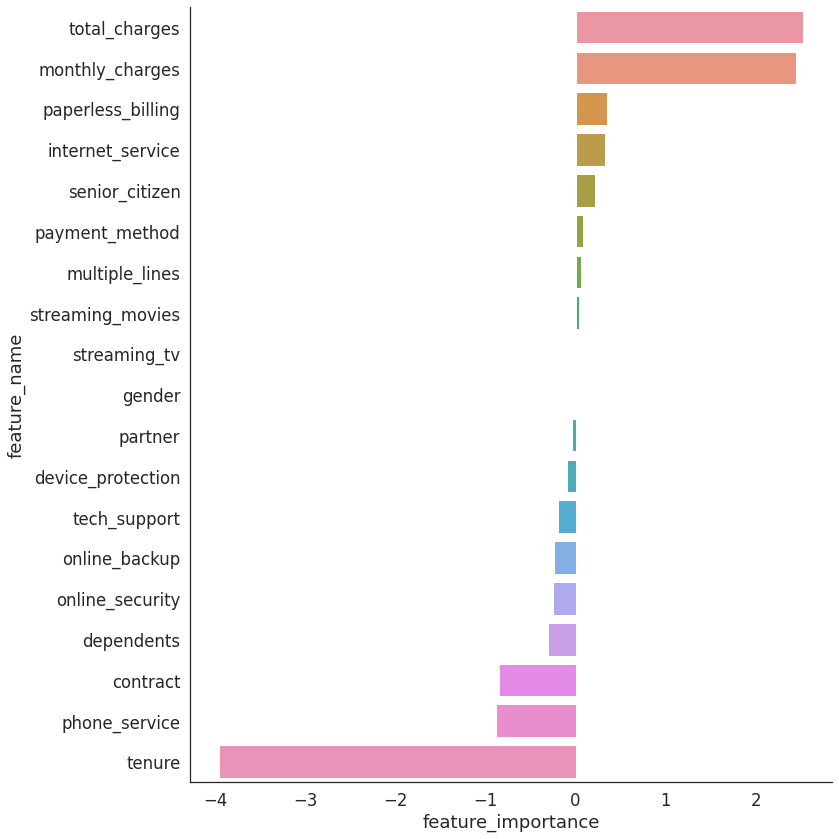

In [51]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression()

embedded = SelectFromModel(estimator=estimator)
embedded.fit(X_train_model, y_train_model)

X_train_embedded = embedded.transform(X_train_model)
X_test_embedded = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embedded.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_importance', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [52]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embedded, y_train_model)
  y_pred_list[name] = model.predict(X_test_embedded)

score_smote_embed_lr = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.741000,0.709000,0.761000,0.713000,0.761000
Ridge Classifier,0.730000,0.702000,0.754000,0.703000,0.754000
KNN,0.753000,0.707000,0.749000,0.717000,0.749000
SVC,0.724000,0.702000,0.756000,0.699000,0.756000
Decision Tree,0.733000,0.663000,0.671000,0.667000,0.671000
Random Forest,0.756000,0.694000,0.711000,0.701000,0.711000
AdaBoost,0.741000,0.711000,0.764000,0.713000,0.764000
Gradient Boosting,0.746000,0.710000,0.759000,0.716000,0.759000
Hist Gradient Boosting,0.756000,0.708000,0.748000,0.718000,0.748000


#### Decision Tree

before embedded	: (7244, 19)
after embedded	: (7244, 5)


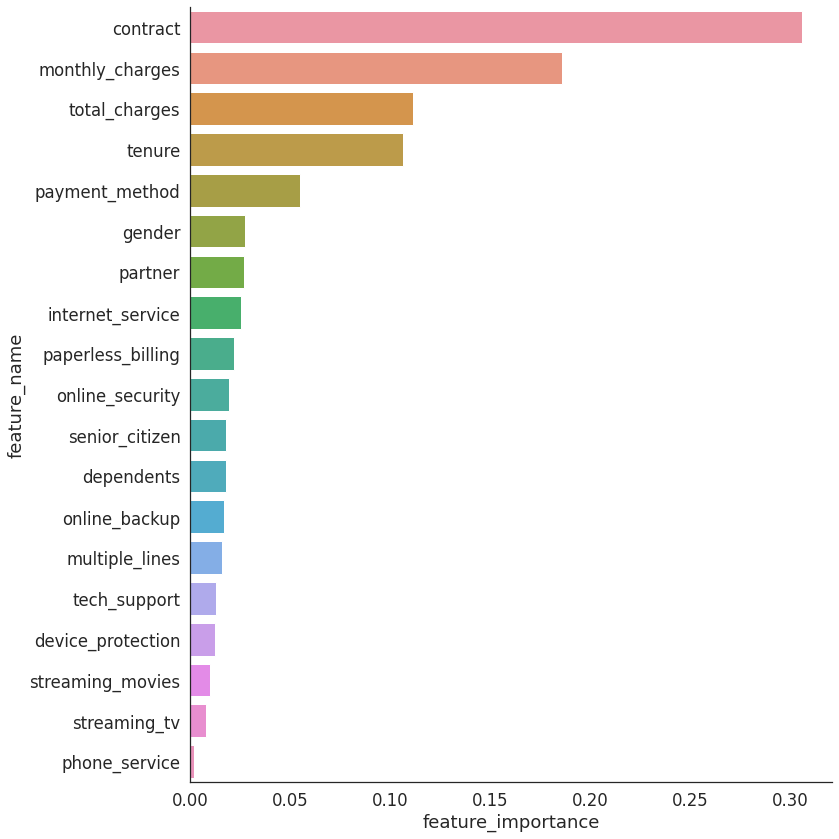

In [47]:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = DecisionTreeClassifier(random_state=1)

embedded = SelectFromModel(estimator=estimator)
embedded.fit(X_train_model, y_train_model)

X_train_embedded = embedded.transform(X_train_model)
X_test_embedded = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embedded.shape)

# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.feature_importances_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)

# plot the score
fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(data=feature_selection.iloc[0:20,:], x='feature_importance', y='feature_name', ax=ax)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax)

plt.tight_layout()
sns.despine()
plt.show()

In [48]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embedded, y_train_model)
  y_pred_list[name] = model.predict(X_test_embedded)

score_smote_embed_dt = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.731000,0.706000,0.761000,0.706000,0.761000
Ridge Classifier,0.725000,0.693000,0.742000,0.695000,0.742000
KNN,0.753000,0.701000,0.734000,0.710000,0.734000
SVC,0.725000,0.703000,0.757000,0.700000,0.757000
Decision Tree,0.736000,0.672000,0.688000,0.678000,0.688000
Random Forest,0.760000,0.698000,0.714000,0.705000,0.714000
AdaBoost,0.756000,0.709000,0.751000,0.719000,0.751000
Gradient Boosting,0.757000,0.706000,0.740000,0.715000,0.740000
Hist Gradient Boosting,0.760000,0.706000,0.737000,0.716000,0.737000


### Manual (by correlation)

In [67]:
X_train_manual = X_train_model.loc[:, ['contract', 'tenure', 'online_security',
                                   'tech_support', 'internet_service', 'payment_method',
                                   'online_backup', 'device_protection']].copy()
X_test_manual = X_test_scale.loc[:, ['contract', 'tenure', 'online_security',
                                 'tech_support', 'internet_service', 'payment_method',
                                 'online_backup', 'device_protection']].copy()

y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_manual, y_train_model)
  y_pred_list[name] = model.predict(X_test_manual)

score_smote_manual = print_score(y_pred_list, orderby='accuracy', sort=False)
# print_score(y_pred_list, 'f1_score')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.691000,0.688000,0.742000,0.672000,0.742000
Ridge Classifier,0.681000,0.687000,0.740000,0.664000,0.740000
KNN,0.753000,0.694000,0.718000,0.703000,0.718000
SVC,0.739000,0.696000,0.739000,0.703000,0.739000
Decision Tree,0.741000,0.673000,0.682000,0.677000,0.682000
Random Forest,0.753000,0.688000,0.700000,0.693000,0.700000
AdaBoost,0.761000,0.712000,0.751000,0.722000,0.751000
Gradient Boosting,0.762000,0.712000,0.748000,0.722000,0.748000
Hist Gradient Boosting,0.764000,0.708000,0.735000,0.717000,0.735000


### Compare

In [69]:
scoring_list = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

score_compare = dict()

for score in scoring_list:
  col_smote = score_smote.loc[:, score]
  col_smote_filter = score_smote_filter.loc[:, score]
  col_smote_wrap_lr = score_smote_wrap_lr.loc[:, score]
  col_smote_wrap_dt = score_smote_wrap_dt.loc[:, score]
  col_smote_embed_lr = score_smote_embed_lr.loc[:, score]
  col_smote_embed_dt = score_smote_embed_dt.loc[:, score]
  col_smote_manual = score_smote_manual.loc[:, score]

  score_dict = {
    col_smote.name + '_smote' : col_smote.sort_index().values,
    col_smote_filter.name + '_smote_filter' : col_smote_filter.sort_index().values,
    col_smote_wrap_lr.name + '_smote_wrap_lr' : col_smote_wrap_lr.sort_index().values,
    col_smote_wrap_dt.name + '_smote_wrap_dt' : col_smote_wrap_dt.sort_index().values,
    col_smote_embed_lr.name + '_smote_embed_lr' : col_smote_embed_lr.sort_index().values,
    col_smote_embed_dt.name + '_smote_embed_dt' : col_smote_embed_dt.sort_index().values,
    col_smote_manual.name + '_smote_manual' : col_smote_manual.sort_index().values,
  }

  # score_df = pd.DataFrame(score_dict, index=col_smote_filter.sort_index().index).sort_values(score+'_smote_filter', ascending=False)
  score_df = pd.DataFrame(score_dict, index=col_smote_filter.sort_index().index)
  # display(score_df.style.highlight_max(props='color:white; background-color:#008FD5').highlight_min(props='color:white; background-color:#FC4F30'))

  score_compare[score] = score_df

#### Accuracy

In [70]:
highlight_max_min(score_compare['accuracy'])

,accuracy_smote,accuracy_smote_filter,accuracy_smote_wrap_lr,accuracy_smote_wrap_dt,accuracy_smote_embed_lr,accuracy_smote_embed_dt,accuracy_smote_manual
model,,,,,,,
AdaBoost,0.774000,0.768000,0.774000,0.775000,0.741000,0.756000,0.761000
Decision Tree,0.727000,0.727000,0.734000,0.740000,0.733000,0.736000,0.741000
Gradient Boosting,0.789000,0.769000,0.782000,0.777000,0.746000,0.757000,0.762000
Hist Gradient Boosting,0.781000,0.779000,0.777000,0.783000,0.756000,0.760000,0.764000
KNN,0.678000,0.736000,0.741000,0.734000,0.753000,0.753000,0.753000
Logistic Regression,0.752000,0.743000,0.752000,0.743000,0.741000,0.731000,0.691000
Neural Network,0.732000,0.755000,0.775000,0.760000,0.729000,0.729000,0.753000
Random Forest,0.777000,0.769000,0.778000,0.772000,0.756000,0.760000,0.753000
Ridge Classifier,0.748000,0.736000,0.741000,0.734000,0.730000,0.725000,0.681000


#### Precision

In [71]:
highlight_max_min(score_compare['precision'])

,precision_smote,precision_smote_filter,precision_smote_wrap_lr,precision_smote_wrap_dt,precision_smote_embed_lr,precision_smote_embed_dt,precision_smote_manual
model,,,,,,,
AdaBoost,0.720000,0.721000,0.726000,0.723000,0.711000,0.709000,0.712000
Decision Tree,0.663000,0.657000,0.662000,0.673000,0.663000,0.672000,0.673000
Gradient Boosting,0.734000,0.720000,0.730000,0.721000,0.710000,0.706000,0.712000
Hist Gradient Boosting,0.721000,0.723000,0.718000,0.722000,0.708000,0.706000,0.708000
KNN,0.645000,0.680000,0.680000,0.675000,0.707000,0.701000,0.694000
Logistic Regression,0.716000,0.708000,0.715000,0.712000,0.709000,0.706000,0.688000
Neural Network,0.666000,0.709000,0.722000,0.706000,0.703000,0.699000,0.703000
Random Forest,0.715000,0.706000,0.716000,0.708000,0.694000,0.698000,0.688000
Ridge Classifier,0.712000,0.704000,0.707000,0.703000,0.702000,0.693000,0.687000


#### Recall

In [72]:
highlight_max_min(score_compare['recall'])

,recall_smote,recall_smote_filter,recall_smote_wrap_lr,recall_smote_wrap_dt,recall_smote_embed_lr,recall_smote_embed_dt,recall_smote_manual
model,,,,,,,
AdaBoost,0.751000,0.764000,0.767000,0.756000,0.764000,0.751000,0.751000
Decision Tree,0.680000,0.666000,0.669000,0.685000,0.671000,0.688000,0.682000
Gradient Boosting,0.755000,0.761000,0.762000,0.746000,0.759000,0.740000,0.748000
Hist Gradient Boosting,0.726000,0.750000,0.734000,0.728000,0.748000,0.737000,0.735000
KNN,0.681000,0.709000,0.701000,0.699000,0.749000,0.734000,0.718000
Logistic Regression,0.767000,0.758000,0.765000,0.766000,0.761000,0.761000,0.742000
Neural Network,0.681000,0.750000,0.754000,0.737000,0.756000,0.750000,0.740000
Random Forest,0.720000,0.716000,0.721000,0.709000,0.711000,0.714000,0.700000
Ridge Classifier,0.762000,0.755000,0.758000,0.754000,0.754000,0.742000,0.740000


#### F1 Score

In [73]:
highlight_max_min(score_compare['f1_score'])

,f1_score_smote,f1_score_smote_filter,f1_score_smote_wrap_lr,f1_score_smote_wrap_dt,f1_score_smote_embed_lr,f1_score_smote_embed_dt,f1_score_smote_manual
model,,,,,,,
AdaBoost,0.730000,0.732000,0.737000,0.734000,0.713000,0.719000,0.722000
Decision Tree,0.669000,0.661000,0.665000,0.678000,0.667000,0.678000,0.677000
Gradient Boosting,0.742000,0.731000,0.741000,0.730000,0.716000,0.715000,0.722000
Hist Gradient Boosting,0.723000,0.733000,0.725000,0.725000,0.718000,0.716000,0.717000
KNN,0.643000,0.688000,0.687000,0.682000,0.717000,0.710000,0.703000
Logistic Regression,0.722000,0.713000,0.721000,0.715000,0.713000,0.706000,0.672000
Neural Network,0.672000,0.718000,0.733000,0.715000,0.703000,0.701000,0.712000
Random Forest,0.717000,0.711000,0.718000,0.709000,0.701000,0.705000,0.693000
Ridge Classifier,0.718000,0.707000,0.711000,0.706000,0.703000,0.695000,0.664000


#### ROC AUC

In [74]:
highlight_max_min(score_compare['roc_auc'])

,roc_auc_smote,roc_auc_smote_filter,roc_auc_smote_wrap_lr,roc_auc_smote_wrap_dt,roc_auc_smote_embed_lr,roc_auc_smote_embed_dt,roc_auc_smote_manual
model,,,,,,,
AdaBoost,0.751000,0.764000,0.767000,0.756000,0.764000,0.751000,0.751000
Decision Tree,0.680000,0.666000,0.669000,0.685000,0.671000,0.688000,0.682000
Gradient Boosting,0.755000,0.761000,0.762000,0.746000,0.759000,0.740000,0.748000
Hist Gradient Boosting,0.726000,0.750000,0.734000,0.728000,0.748000,0.737000,0.735000
KNN,0.681000,0.709000,0.701000,0.699000,0.749000,0.734000,0.718000
Logistic Regression,0.767000,0.758000,0.765000,0.766000,0.761000,0.761000,0.742000
Neural Network,0.681000,0.750000,0.754000,0.737000,0.756000,0.750000,0.740000
Random Forest,0.720000,0.716000,0.721000,0.709000,0.711000,0.714000,0.700000
Ridge Classifier,0.762000,0.755000,0.758000,0.754000,0.754000,0.742000,0.740000


In [ ]:
model_list_gs = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    'KNN':KNeighborsClassifier(),
    # 'SVC':SVC(),
    # 'Decision Tree':DecisionTreeClassifier(random_state=1),
    # 'Random Forest':RandomForestClassifier(random_state=1),
}

param_list = {
    'Logistic Regression':dict(solver=['newton-cg', 'lbfgs', 'liblinear'],
                               penalty=['l2'],
                               C=[100, 10, 1.0, 0.1, 0.01]),
              
    'Ridge Classifier':dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

    'KNN':dict(n_neighbors=range(1, 21, 2),
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan', 'minkowski']),
              
    'SVC':dict(kernel=['poly', 'rbf', 'sigmoid'],
               C=[50, 10, 1.0, 0.1, 0.01],
               gamma=['scale']),
              
    'Decision Tree':dict(max_depth=[5, 10, 15, 20, 25],
                         min_samples_leaf=[1, 3],
                         max_leaf_nodes=[10, 20, 30, 40, 50]),
              
    'Random Forest':dict(n_estimators=[10, 100, 1000],
                         max_features=['sqrt', 'log2']),
}

best_param_list = dict()

for name, model in model_list_gs.items():
  best_param_list[name] = grid_search(model, param_list[name], X_train_smote.loc[:,selected_feature], y_train_smote, name=name, scoring='accuracy')

y_pred_list = dict()

for name, model in model_list_gs.items():
  model.set_params(**best_param_list[name])
  model.fit(X_train_smote.loc[:,selected_feature], y_train_smote)
  y_pred_list[name] = model.predict(X_test_scale.loc[:,selected_feature].values)

score_smote_gs = print_score(y_pred_list, orderby='accuracy')

Logistic Regression	: 0.772 with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Ridge Classifier	: 0.768 with {'alpha': 0.9}
KNN	: 0.81 with {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
KNN,0.753000,0.692000,0.711000,0.699000,0.711000
Logistic Regression,0.743000,0.705000,0.753000,0.711000,0.753000
Ridge Classifier,0.737000,0.704000,0.754000,0.708000,0.754000


## AdaBoost Tuning

In [ ]:
for i in range(1,11):
  base = DecisionTreeClassifier(max_depth=i)
  model = AdaBoostClassifier(base_estimator=base)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1)

  print(f'{i} {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

1	 0.817 (0.015)
2	 0.841 (0.015)
3	 0.83 (0.015)
4	 0.823 (0.017)
5	 0.814 (0.018)
6	 0.814 (0.013)
7	 0.82 (0.012)
8	 0.83 (0.01)
9	 0.835 (0.012)
10	 0.841 (0.013)


In [ ]:
for i in range(11,21):
  base = DecisionTreeClassifier(max_depth=i)
  model = AdaBoostClassifier(base_estimator=base)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X_train_smote, y_train_smote, scoring='accuracy', cv=cv, n_jobs=-1)

  print(f'{i} {np.mean(scores).round(3)} ({np.std(scores).round(3)})')

11 0.844 (0.011)
12 0.844 (0.013)
13 0.846 (0.013)
14 0.845 (0.012)
15 0.849 (0.012)
16 0.851 (0.011)
17 0.851 (0.011)
18 0.853 (0.013)
19 0.852 (0.013)
20 0.85 (0.013)


In [ ]:
# # base = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=50, min_samples_leaf=1)
# model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# grid_param = {'base_estimator__max_depth':[5, 10, 15, 20, 25],
#               'base_estimator__min_samples_leaf':[1,3],
#               'base_estimator__max_leaf_nodes':[10, 20, 30, 40, 50],
#               'n_estimators':[10, 50, 100, 500],
#               }

# grid_best_param = grid_search(model, grid_param, X_train_smote, y_train_smote)

# # model.fit(X_train_smote, y_train_smote)

# # y_pred = model.predict(X_test_scale)

# # print_report(y_test_encode, y_pred)

## Grid Search
- decision tree
  - criterion
  - max_depth
  - min_samples_split
  - min_samples_leaf
  - max_features
  - max_leaf_nodes
- [randomforest](https://machinelearningmastery.com/random-forest-ensemble-in-python/)
  - jumlah tree (n_estimators)
  - max samples
  - max features
  - max depth
  <br><br>
  - min sample split
  - min sample leaf
  - max leaf nodes
  
- [AdaBoost](https://machinelearningmastery.com/adaboost-ensemble-in-python/)
  - Explore Number of Trees (n_estimators)
  - Explore Weak Learner (decision tree parameter)
  - Explore Learning Rate
  <br><br>
  - Explore Alternate Algorithm

- [XGBoost](https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/)
  - Explore Number of Trees (n_estimators)
  - Explore Number of Features (colsample_bynode)

In [ ]:
model_list_gs = {
    'Logistic Regression':LogisticRegression(max_iter=500),
    'Ridge Classifier':RidgeClassifier(),
    # 'KNN':KNeighborsClassifier(),
    # 'SVC':SVC(),
    # 'Decision Tree':DecisionTreeClassifier(random_state=1),
    # 'Random Forest':RandomForestClassifier(random_state=1),
}

param_list = {
    'Logistic Regression':dict(solver=['newton-cg', 'lbfgs', 'liblinear'],
                               penalty=['l2'],
                               C=[100, 10, 1.0, 0.1, 0.01]),
              
    'Ridge Classifier':dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),

    'KNN':dict(n_neighbors=range(1, 21, 2),
               weights=['uniform', 'distance'],
               metric=['euclidean', 'manhattan', 'minkowski']),
              
    'SVC':dict(kernel=['poly', 'rbf', 'sigmoid'],
               C=[50, 10, 1.0, 0.1, 0.01],
               gamma=['scale']),
              
    'Decision Tree':dict(max_depth=[5, 10, 15, 20, 25],
                         min_samples_leaf=[1, 3],
                         max_leaf_nodes=[10, 20, 30, 40, 50]),
              
    'Random Forest':dict(n_estimators=[10, 100, 1000],
                         max_features=['sqrt', 'log2']),
}

### SMOTE

In [ ]:
best_param_list = dict()

for name, model in model_list_gs.items():
  best_param_list[name] = grid_search(model, param_list[name], X_train_smote, y_train_smote, name=name, scoring='accuracy')

Logistic Regression	: 0.779 with {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Ridge Classifier	: 0.774 with {'alpha': 0.8}


In [ ]:
y_pred_list = dict()

for name, model in model_list_gs.items():
  model.set_params(**best_param_list[name])
  model.fit(X_train_smote, y_train_smote)

  y_pred_list[name] = model.predict(X_test_scale)

score_smote_gs = print_score(y_pred_list, orderby='accuracy')

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.746000,0.709000,0.759000,0.715000,0.759000
Ridge Classifier,0.744000,0.707000,0.755000,0.713000,0.755000


# Model Evaluation

## Ref 1
**Precision**<br>
Intuitively speaking, if we have a 100% precise model, that means it could catch all True positive but there were NO False Positive.<br>
![Precision](https://i.stack.imgur.com/bSmbY.png)
<br><br>

**Recall**<br>
Intuitively speaking, if we have a 100% recall model, that means it did NOT miss any True Positive, in other words, there were NO False Negatives.<br>
![Recall](https://i.stack.imgur.com/J6EUS.png)
<br><br>

**Specificity (1-recall)**<br>
Intuitively speaking, if we have 100% specific model, that means it did NOT miss any True Negative, in other words, there were NO False Positives.<br>
![Specificity](https://i.stack.imgur.com/TE01E.png)
<br><br>

**Rule of Thumb**<br>
As a rule of thumb, if the cost of having False negative is high, we want to increase the model recall (sensitivity)

**Example**<br>
For instance, in fraud detection or sick patient detection, we don't want to label/predict a fraudulent transaction (True Positive) as non-fraudulent (False Negative). Also, we don't want to label/predict a contagious sick patient (True Positive) as not sick (False Negative).
<br><br>
This is because the consequences will be worse than a False Positive (incorrectly labeling a a harmless transaction as fraudulent or a non-contagious patient as contagious).
<br><br>
On the other hand, if the cost of having False Positive is high, then we want to increase the model specificity and precision!.
<br><br>
For instance, in email spam detection, we don't want to label/predict a non-spam email (True Negative) as spam (False Positive). On the other hand, failing to label a spam email as spam (False Negative) is less costly.
<br><br>
ref: [stackoverflow](https://stackoverflow.com/questions/44172162/f1-score-vs-roc-auc)

## Ref 2
https://neptune.ai/blog/evaluation-metrics-binary-classification

https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

**F1 Score**<br>
Simply put, it combines precision and recall into one metric by calculating the harmonic mean between those two. It is actually a special case of the more general function F beta:<br>
![f1score](https://i1.wp.com/neptune.ai/wp-content/uploads/fbeta_eq.png?fit=604%2C88&ssl=1)
<br><br>

When choosing beta in your F-beta score the more you care about recall over precision the higher beta you should choose. For example, with F1 score we care equally about recall and precision with F2 score, recall is twice as important to us.
<br><br>

![img](https://i0.wp.com/neptune.ai/wp-content/uploads/f_by_beta.png?fit=933%2C518&ssl=1)

With 0<beta<1 we care more about precision and so the higher the threshold the higher the F beta score. When beta>1 our optimal threshold moves toward lower thresholds and with beta=1 it is somewhere in the middle.